# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to set a graph theme in seaborn
sns.set_theme(style="darkgrid",  palette="husl")

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/Learning/PGPDSBA/Project-3/used_device_data.csv')

# Take a copy of the data to work it forward.
df=data.copy()

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [ ]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the shape of the dataset

In [ ]:
df.shape

(3454, 15)

* The dataset contains information (15 attributes) about 3454 used Cell Phones

### Checking the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric (*float* and *int* type) and 4 string (*object* type) columns in the data
* The target variable is the normalized_used_price, which is of *float* type

### Statistical summary of the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433



* There are used phones ranging from 2013 to 2020 models with normalized used price varying from 1.53 to 6.62
* The acrage age of the phones in etrms of days used are varying from 91 days to 1094 days with an average of 691 days
* The RAM of the devices a varies from 0.02 GB to 12 GB with an average of 4.04 GB
* The weight of devices varies from 69g to 855g with an average of 182.75g


### Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

* There are no duplicate values in the data

### Checking for missing values

In [ ]:
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


* There are missing values in some of the columns - "main_camera-mp" is the field with most missing values


## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [ ]:
# function to create histogram and boxplot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`screen_size`**

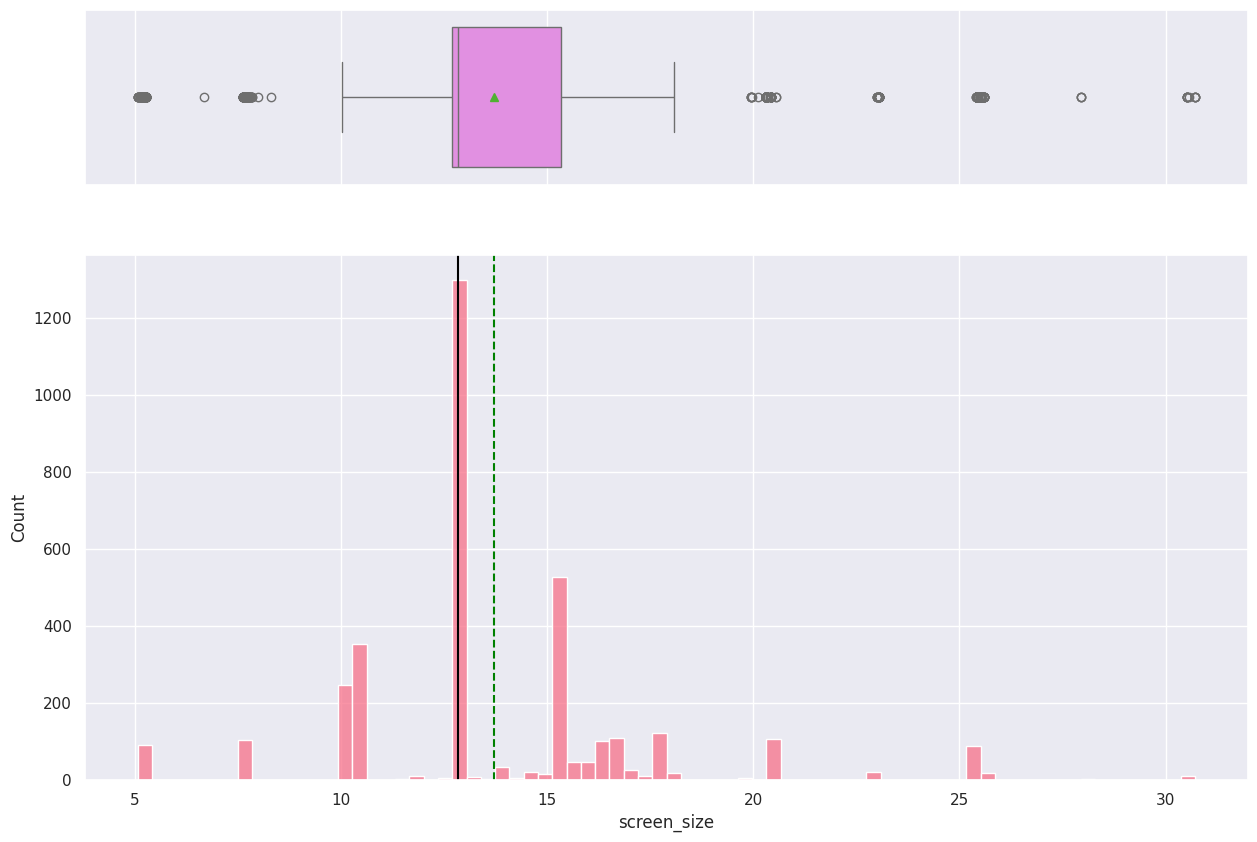

In [ ]:
histogram_boxplot(df, "screen_size")

* There are outliers to screen size variable on both sides.
* The screen size variable slightly shows a normal distribution


**` main_camera_mp `**

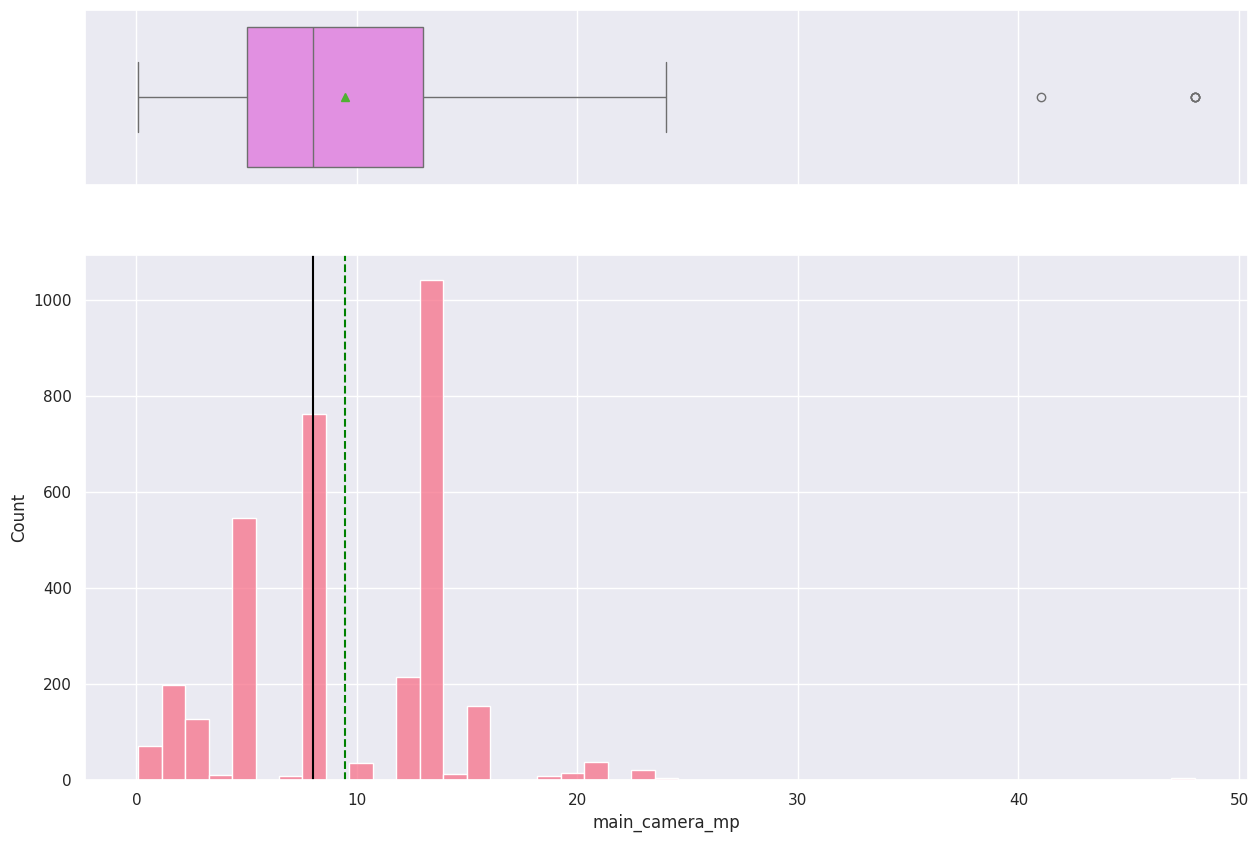

In [ ]:
histogram_boxplot(df, "main_camera_mp")

* The distribution for main_camera_mp seems to rigt skewed.
* There are some outlierrs at the right end

**` selfie_camera_mp   `**

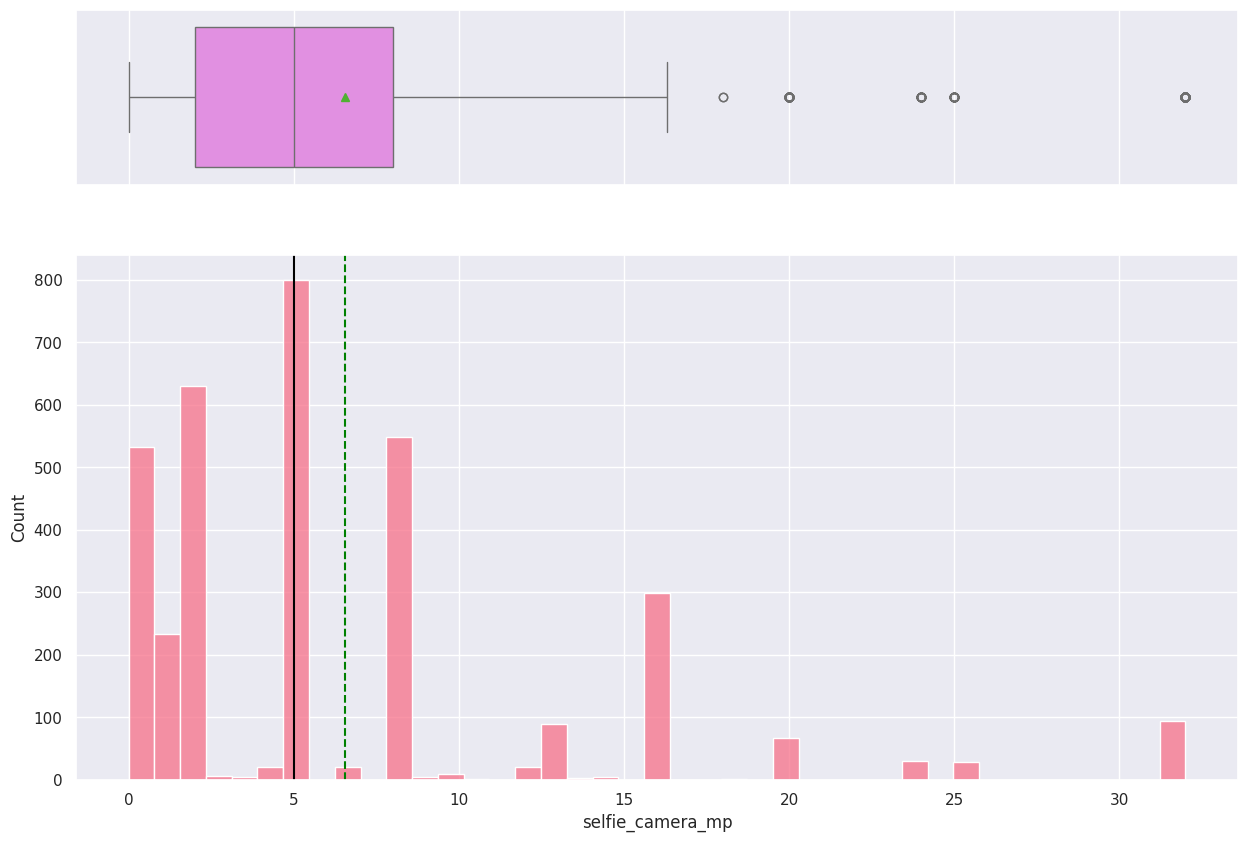

In [ ]:
histogram_boxplot(df, "selfie_camera_mp")

* The distribution seems to be rigt skewed.
* There are some outliers at the right end indicates there are some high resolution cameras

**` int_memory   `**

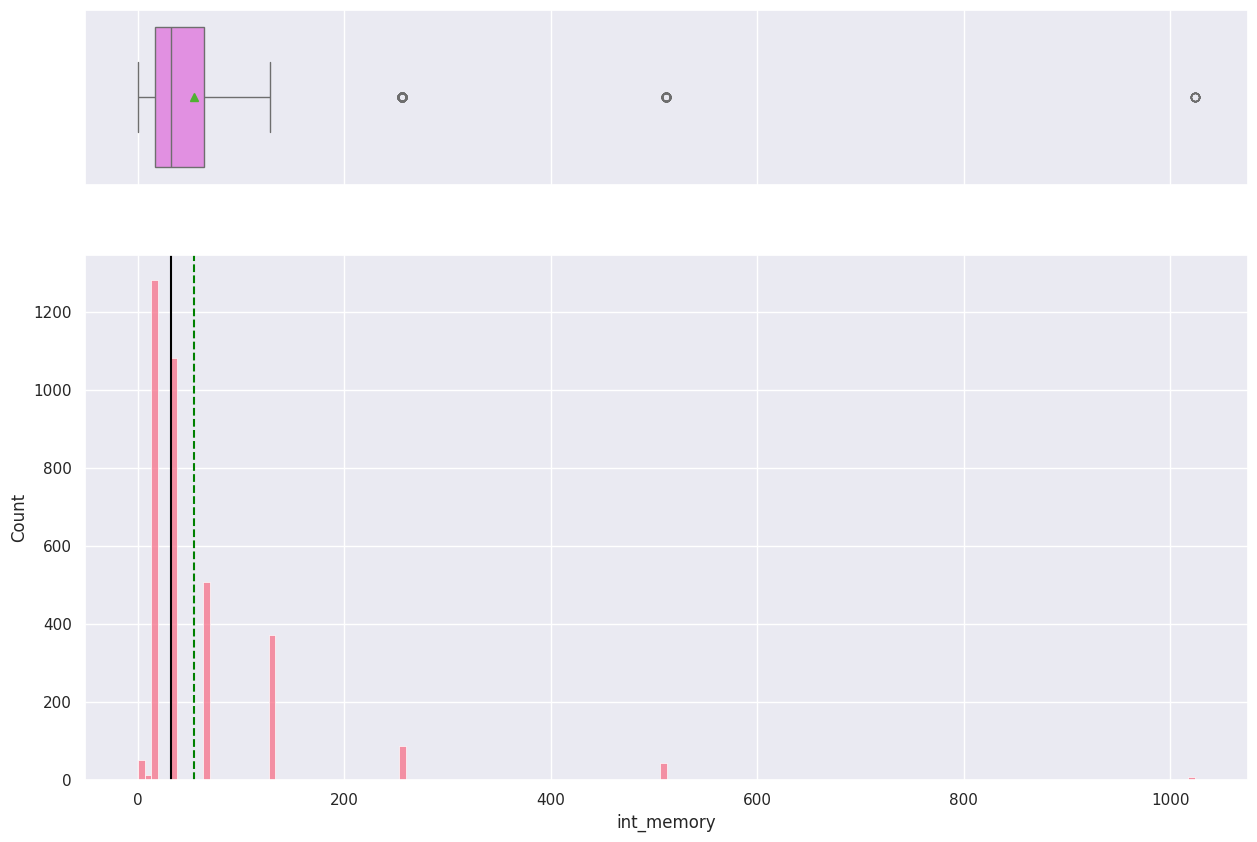

In [ ]:
histogram_boxplot(df, "int_memory")

* The distribution seems to be rigt skewed.
* There are some higher value outliers at the right end.

**` ram   `**

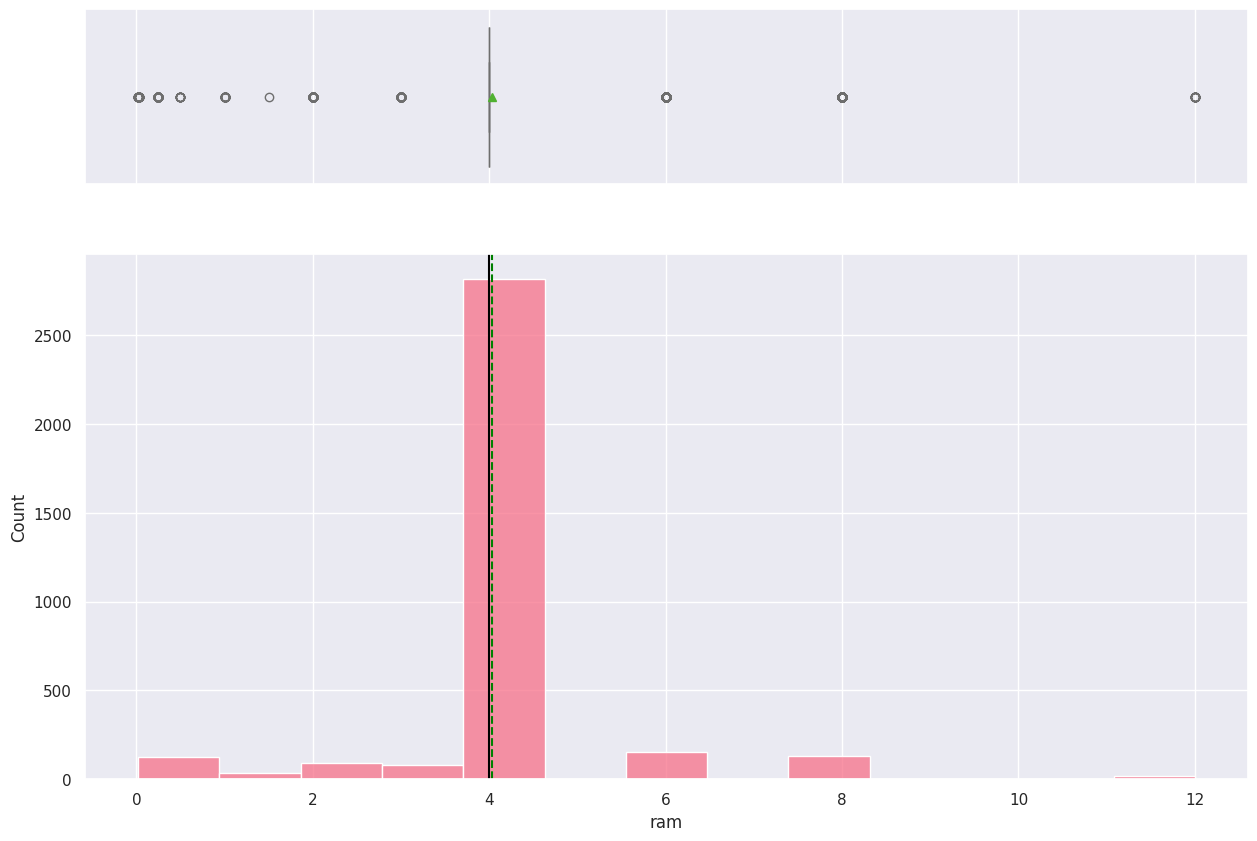

In [ ]:
histogram_boxplot(df, "ram")

* Theres is no specific pattern in  distribution skewness
* There are some higher value outliers on both ends.

**` battery   `**

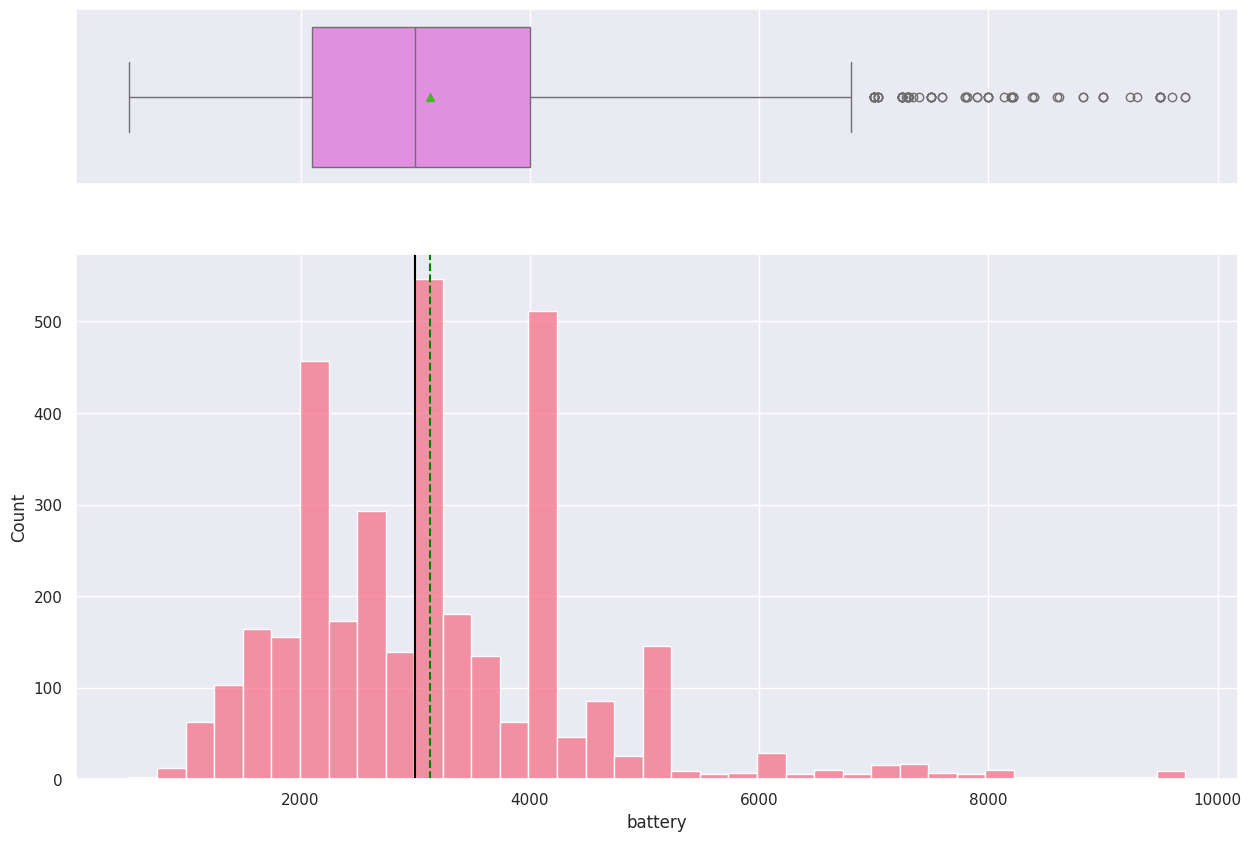

In [ ]:
histogram_boxplot(df, "battery")

* The distribution seems to be multi modal distribution with a long tail.
* There are some higher value outliers at the right end.

**` weight   `**

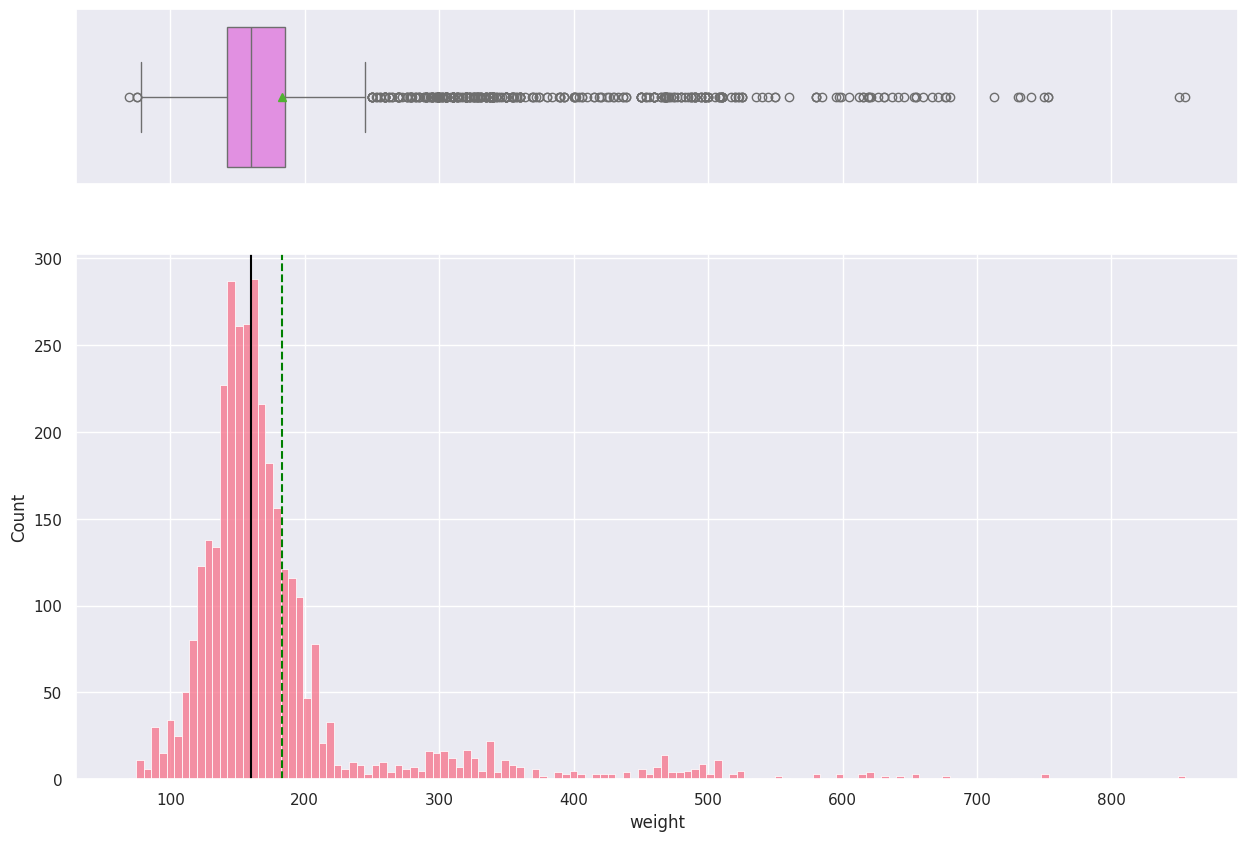

In [ ]:
histogram_boxplot(df, "weight")

* The distribution of the weight for the devices appears to be right skewed
*  There are many outliers on the upper end and some outliers on the lower end.

**` days_used   `**

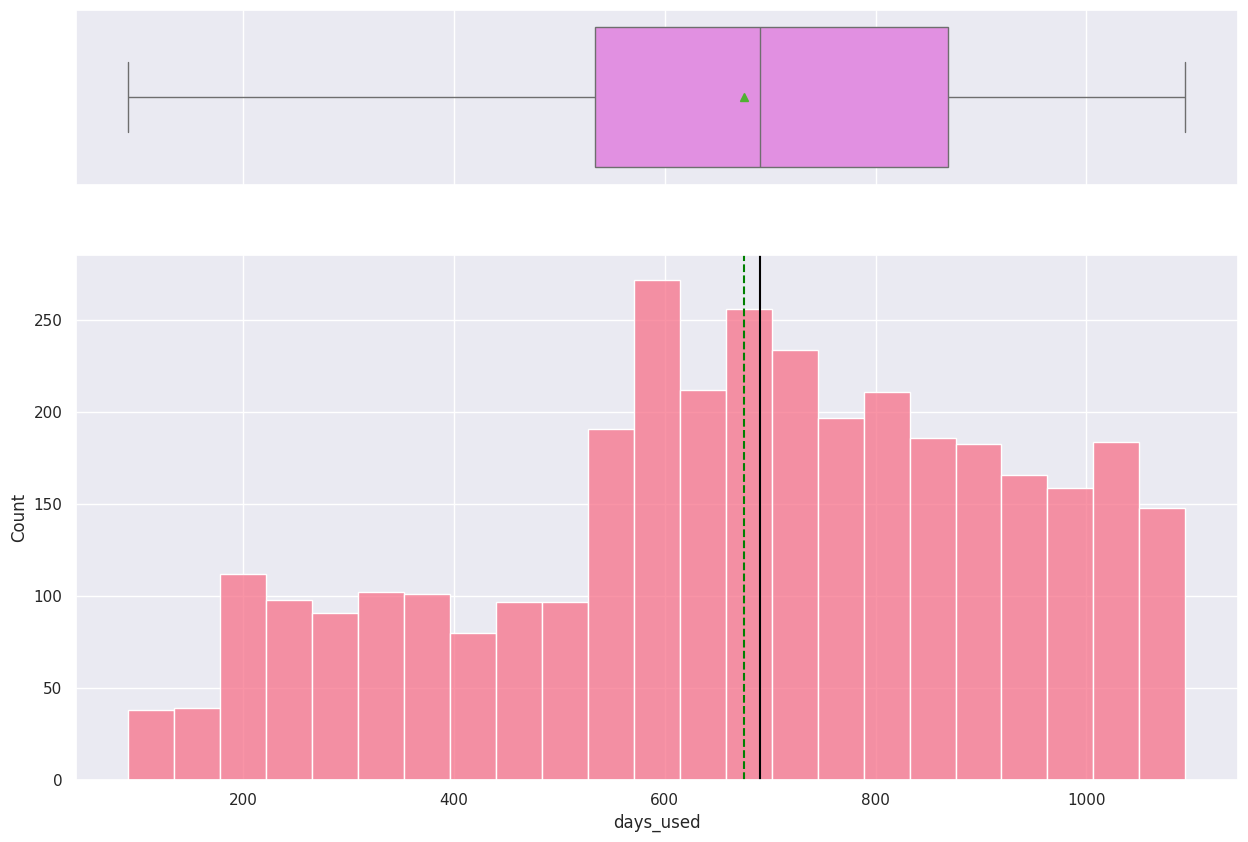

In [ ]:
histogram_boxplot(df, "days_used")

* There seems to be no outliers for this distribution
* The average number of days a refurbished product is used is about 675 days.

**` normalized_used_price   `**

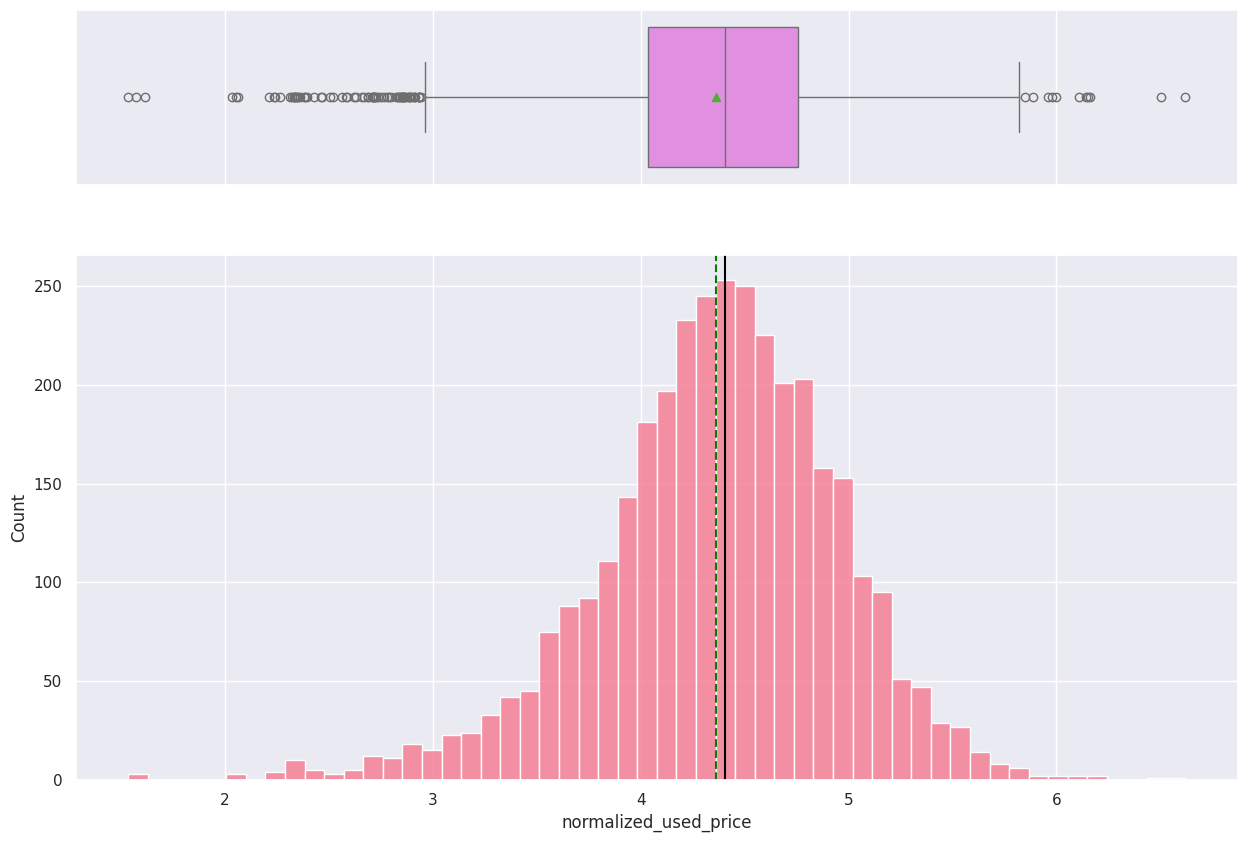

In [ ]:
histogram_boxplot(df, "normalized_used_price")

**What does the distribution of normalized used device prices look like?**

* The normalized used price for the devices seems to be a normal distribution with a long left tail
* There are outliers on both the lower and higher ends.



**` normalized_new_price   `**

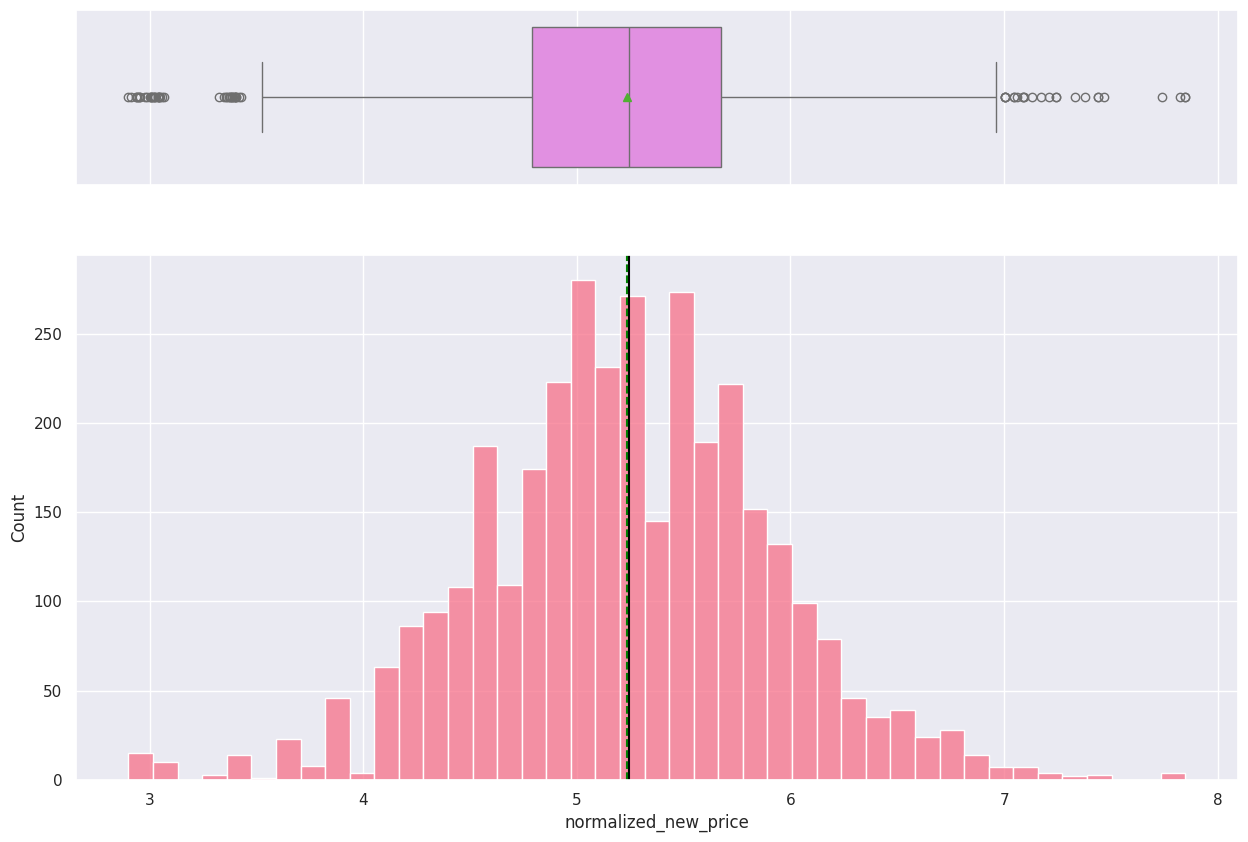

In [ ]:
histogram_boxplot(df, "normalized_new_price")

* The normalized new price for the devices seems to be a normal distribution
* There are outliers on both the lower and higher ends.

**`brand_name`**

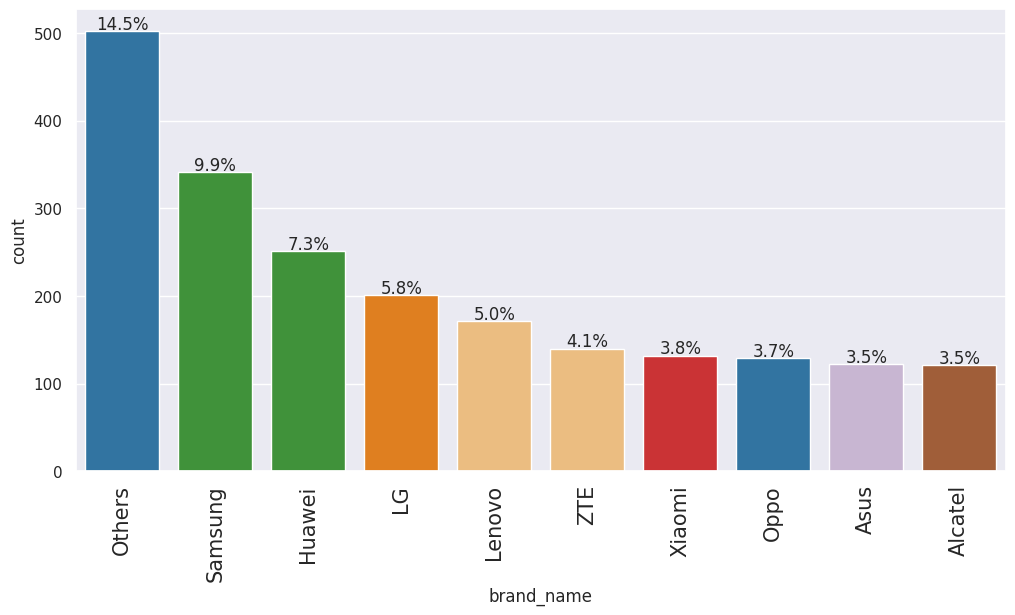

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

* The non-major brands collectivley takes over the used cell phone market followed by the top brands Samsung and Huawei

**`os`**

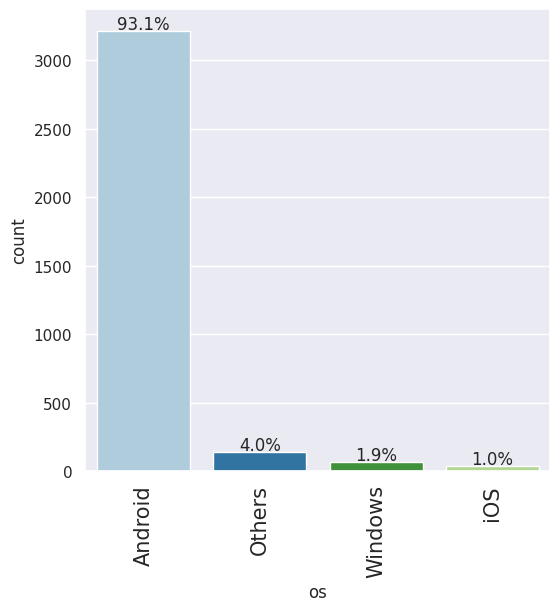

In [ ]:
labeled_barplot(df, 'os',perc=True)

**What percentage of the used device market is dominated by Android devices?**

* 93.1% of the used device market is dominated by Andorid devices
* Android phones take a very major share of the used cell phone market with ios is being at the bottom

**`4g`**

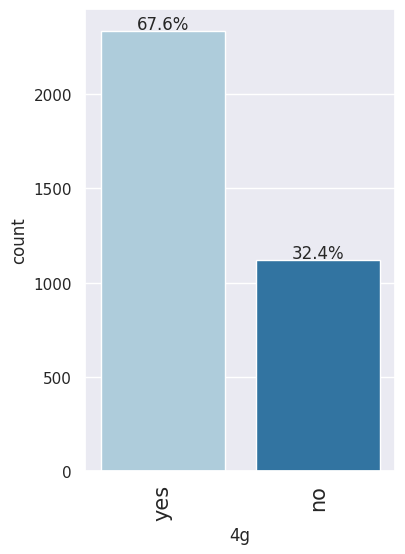

In [ ]:
labeled_barplot(df, '4g', perc=True)

* A major share of 68.6% used cell phones are 4g compatible compared to the others.

**`5g`**

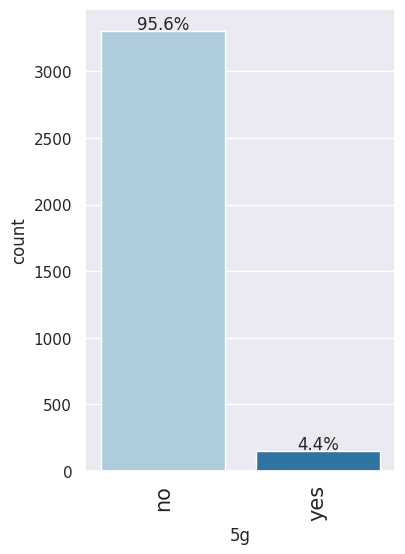

In [ ]:
labeled_barplot(df, '5g', perc=True)

* Only a very small share (4.4%) of teh sued cell phoens are aviable with 5g capability

**`release_year`**

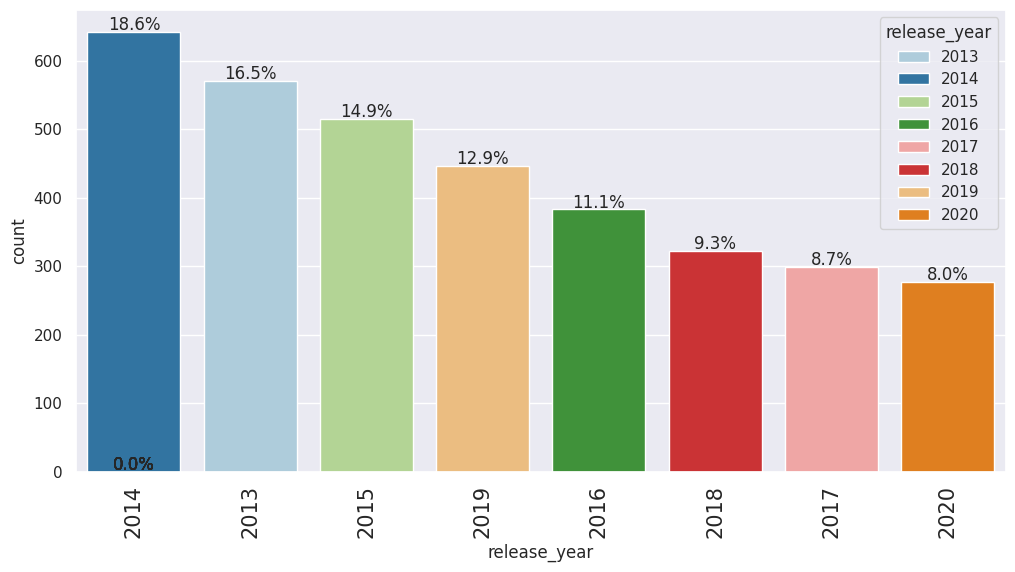

In [ ]:
labeled_barplot(df, 'release_year', perc=True, n=10)

* There is a negative trend on the number of used cell phone availability interms of their release year. In short the newer phones are less available than the older model phones.

### Bivariate Analysis

**Correlation Check**

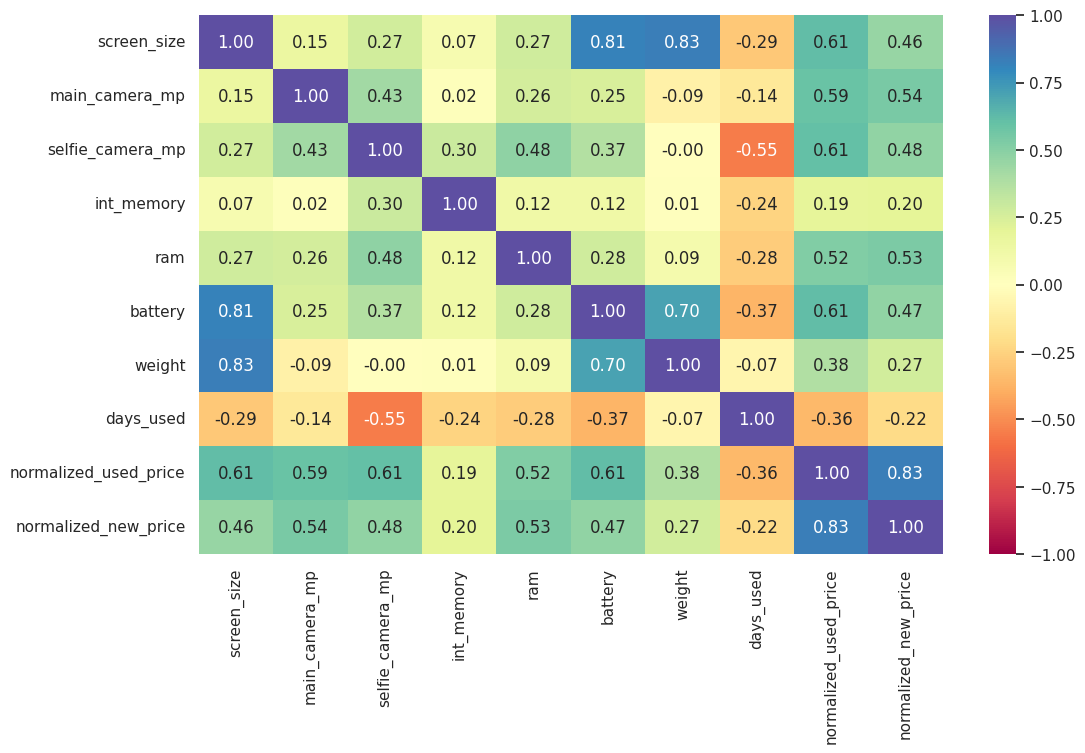

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
# Remove release year as not relevant for correlation
num_cols.remove('release_year')

#plot a heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Which attributes are highly correlated with the normalized price of a used device?**

The normalized price of a used device has a positive correlation with

*  the normalized new price of the device

*  the screen size

*  the battery capacity

*  the resolution of the selfie camera

*  the resolution of the main camera

*  the ram


Also the normalized price of the devices is negatively correlated with the number of days the device has been used.

***Brand name Vs RAM***

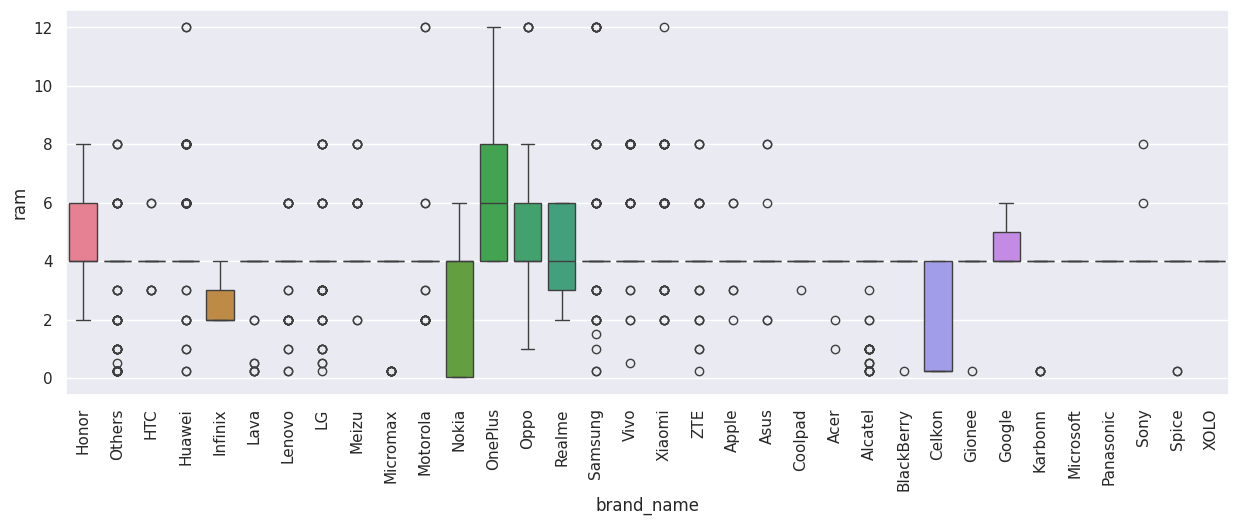

In [ ]:
# Plot brand name vs RAM - boxplot
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x="brand_name", y="ram",hue='brand_name')
plt.xticks(rotation=90)
plt.show()

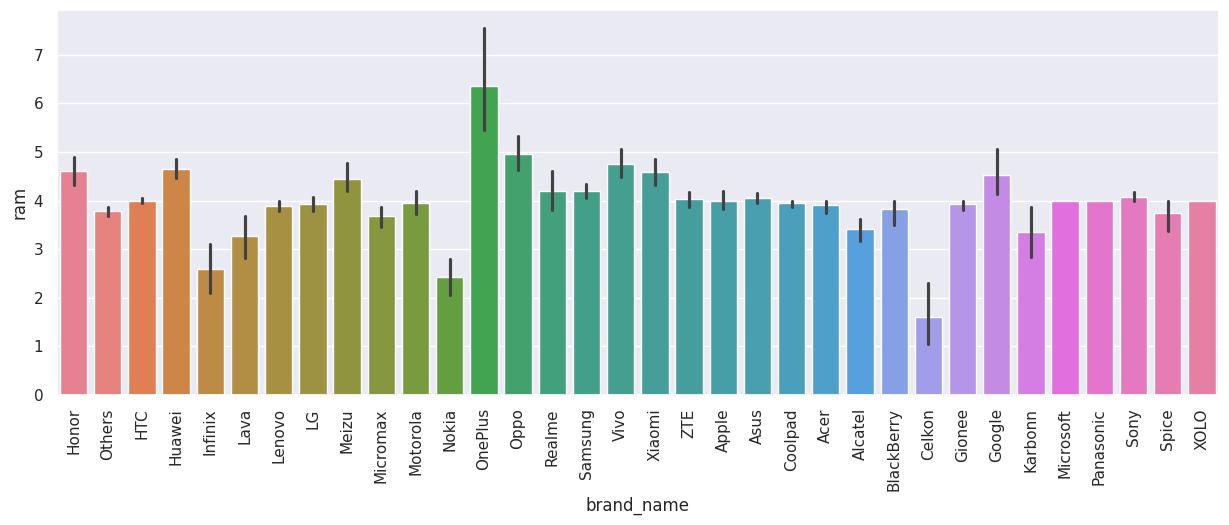

In [ ]:
# Plot brand name vs RAM - use bar plot
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="brand_name", y="ram",hue='brand_name');
plt.xticks(rotation=90)
plt.show()

***The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?***

The OnePlus have relatively higher RAM phone models and the Celkon is the one with models with lesser RAM sizes.

 Most of the brands shows some outliers means they have specific models with higfher RAM sizes.


***Brand name Vs Weight***

***A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?***

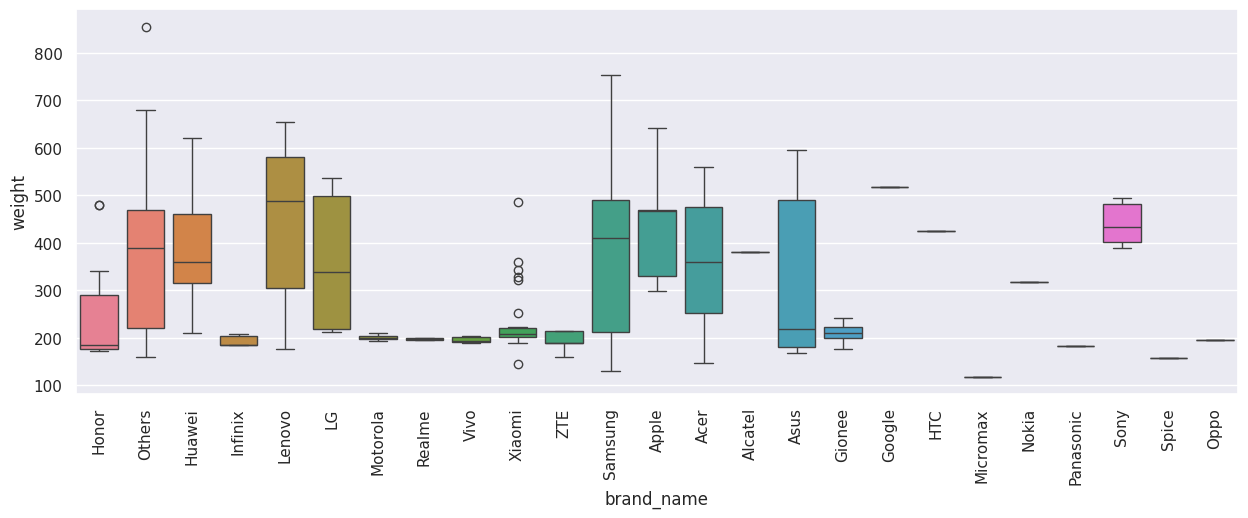

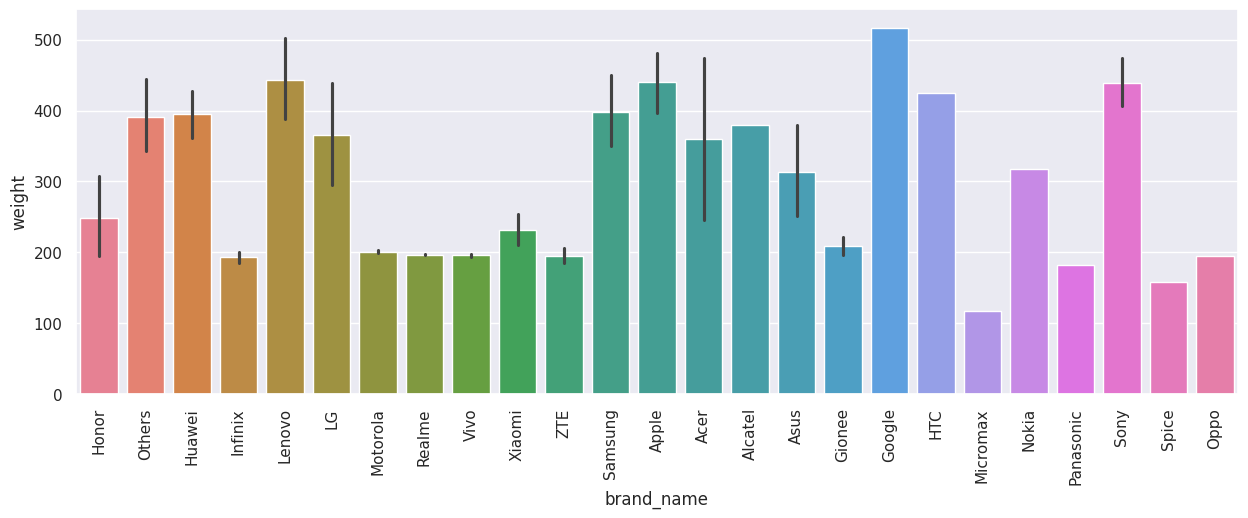

In [ ]:
df_large_battery = df[df['battery'] > 4500]

# Plot brand name vs RAM - boxplot
plt.figure(figsize=(15,5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight",hue='brand_name')
plt.xticks(rotation=90)
plt.show()


# Plot brand name vs RAM - use bar plot
plt.figure(figsize=(15,5))
sns.barplot(data=df_large_battery,x="brand_name", y="weight",hue='brand_name');
plt.xticks(rotation=90)
plt.show()

Google phones are seem to be the heaviest devices in the population and the Micromax are having lightest weight models.

Some phone brand distributions for the weight have outliers.


***Brand name Vs Larger screen size***

***Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?***

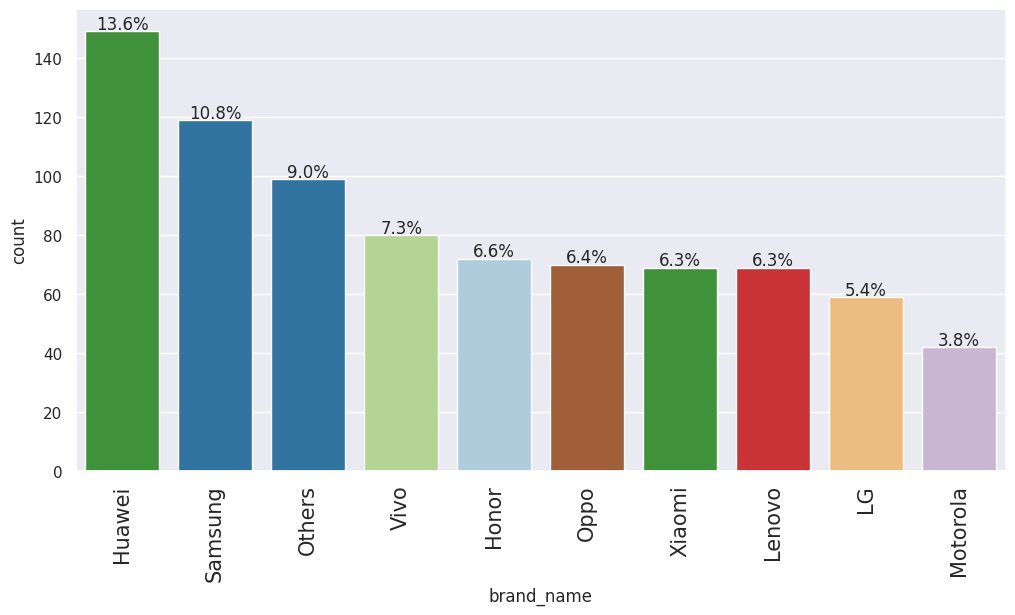

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54]

# create labeled_barplot for 'brand_name' in large screen phones

labeled_barplot(df_large_screen, 'brand_name', perc=True, n=10)

Huawei has the highets number of models with screensize greater than 6 inches followed by Samsung

Motorola has a very small percent fo their models with larger screen sizes

***Brand name Vs Selfie camera quality***

***A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?***

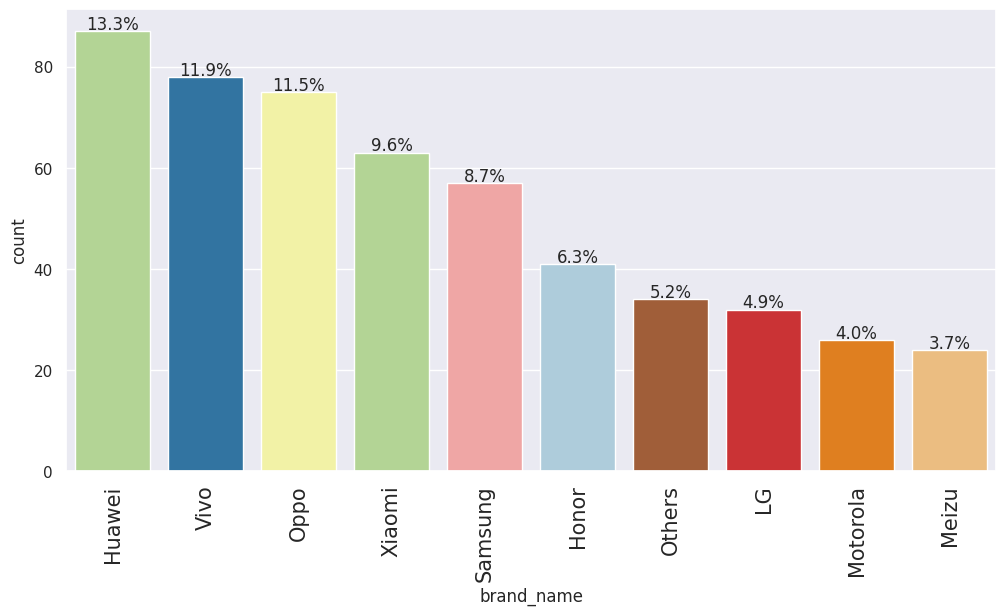

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]

#  create labeled_barplot for 'brand_name' in high quality selfie camera
labeled_barplot(df_selfie_camera, 'brand_name', perc=True, n=10)

Huawei is the leader in the population that offer selefie cameras with high resolutions followed by Vivo and Oppo


***Brand name Vs Main camera quality***

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

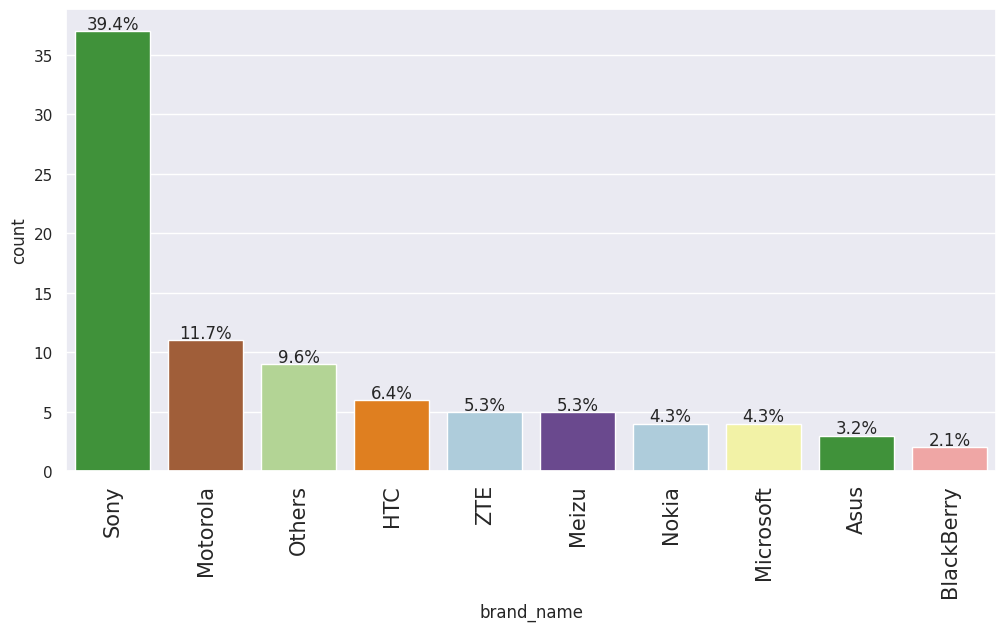

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]

#create labeled_barplot for 'brand_name' in high main camera
labeled_barplot(df_main_camera, 'brand_name', perc=True, n=10)

Sony and Motorola are the brands in teh population that offers rear camers with high resolutions.

***Release Year  Vs Normalized used price***

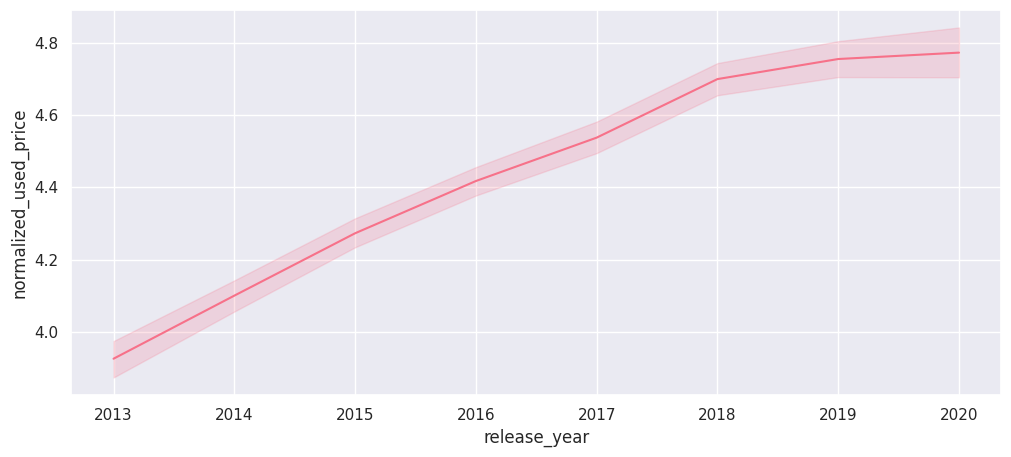

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(df, x='release_year', y='normalized_used_price')
plt.show()

There appears to a postive relationship between the release year of the device and the normalized used price. As the release year of the devices increases, the normalized used price increases as well.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Imputation

In [ ]:
# let's create a copy of the data
df1 = df.copy()

# checking for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


There are 6 varaiables with missing values:

* main_camera_mp has 179 missing values
* selfie_camera_mp has 2 missing values
* int_memory has 4 missing values
* ram has 4 missing values
* battery has 6 missing values
* weight has 7 missing values

*Lets pick these columns and imoute the valus from their median after grouped by release year and brand name*

In [ ]:
# creating a list of variables that contain missing values
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

 # Loop through the columns from above and apply the imputation logic
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year','brand_name'])[col].transform("median")
    )
# checking for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,0
ram,0
battery,6


*There are still more columns to be treated for missing values; lets do the same process but group by just brand_name now*

In [ ]:
# creating a list of variables that contain missing values
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

 # Loop through the columns from above and apply the imputation logic
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,10
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


*Only main_camera_mp has nulls now; lets fill them with the median of the same column*

In [ ]:
## impute the data with median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# checking for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


**All missing values have been treated now!!!**



### Feature Engineering

- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

,years_since_release
count,3454.000000
mean,5.034742
std,2.298455
min,1.000000
25%,3.000000
50%,5.500000
75%,7.000000
max,8.000000


### Outlier Check

Checking for outliers in the data

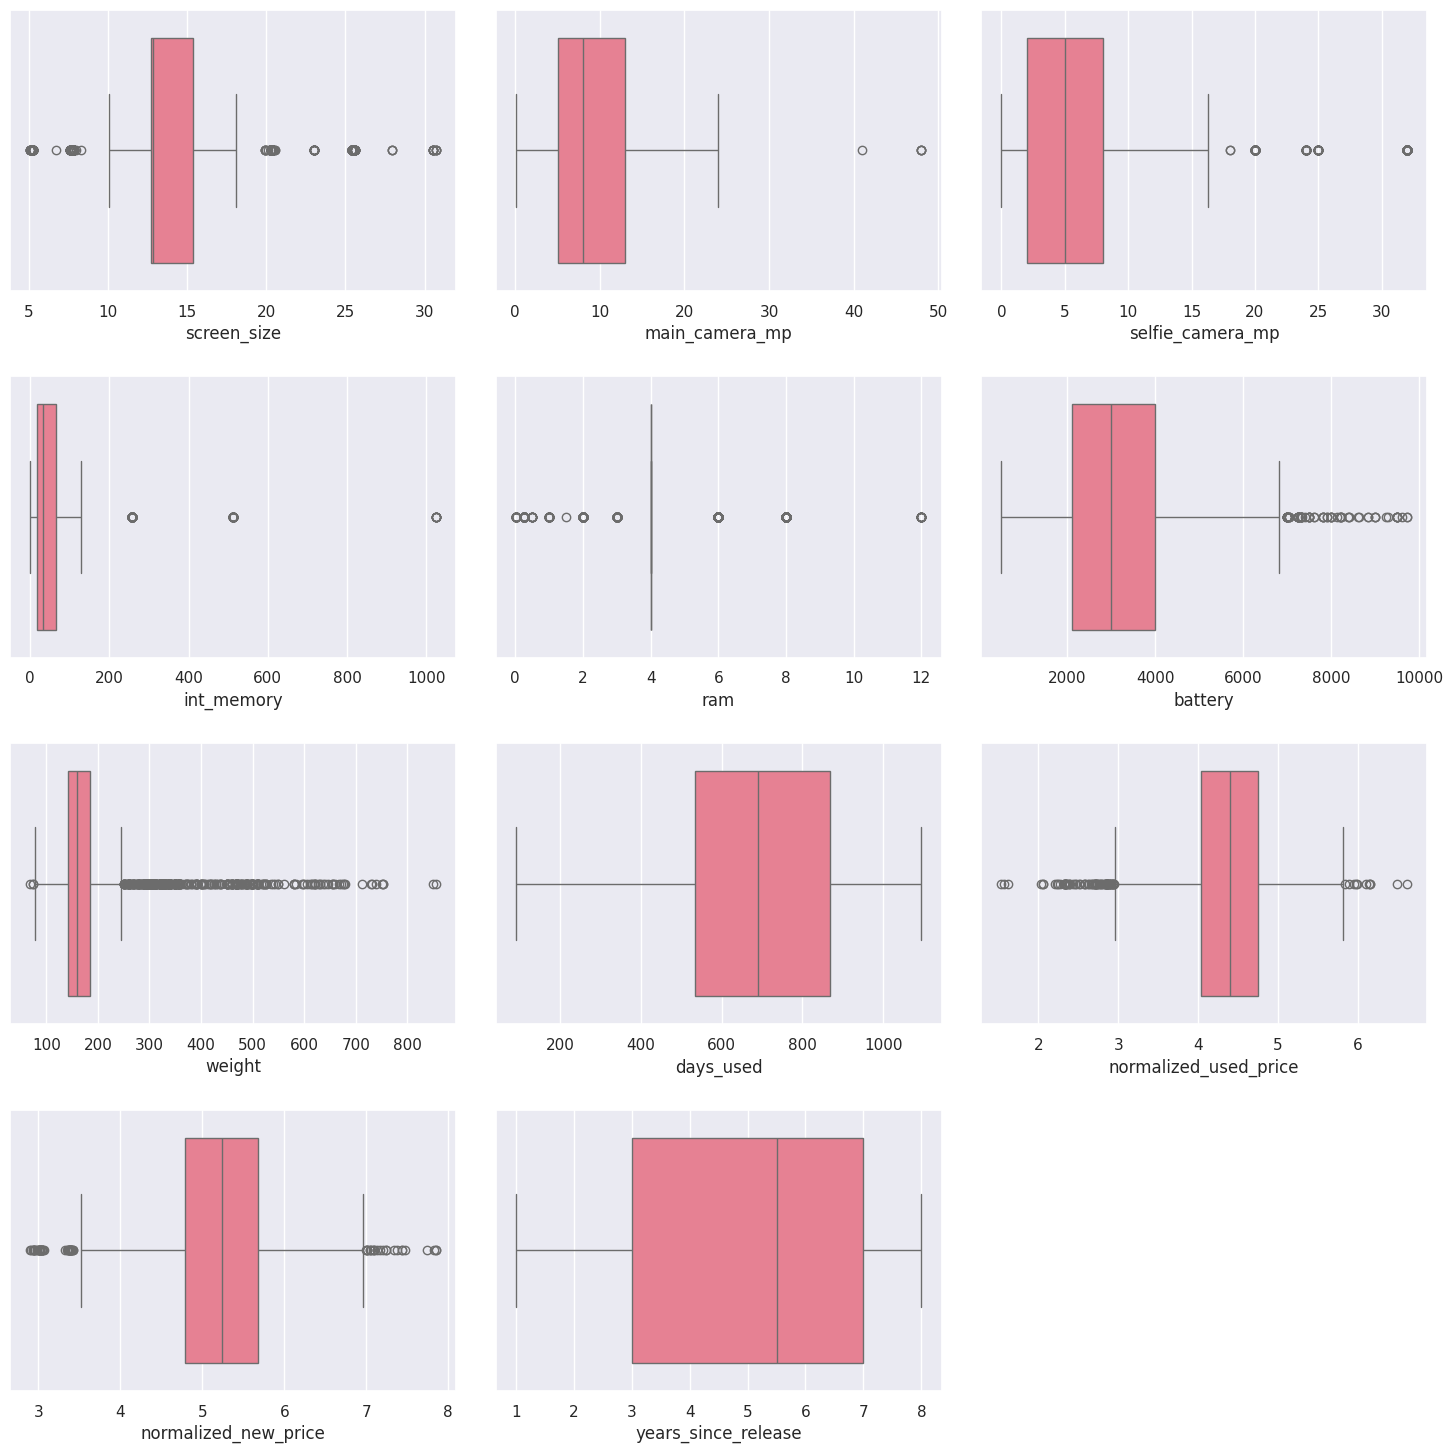

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* There a few columns with outlier data
* However, we will not treat them as they are proper values

## EDA contd

- It is a good idea to explore the data once again after manipulating it.

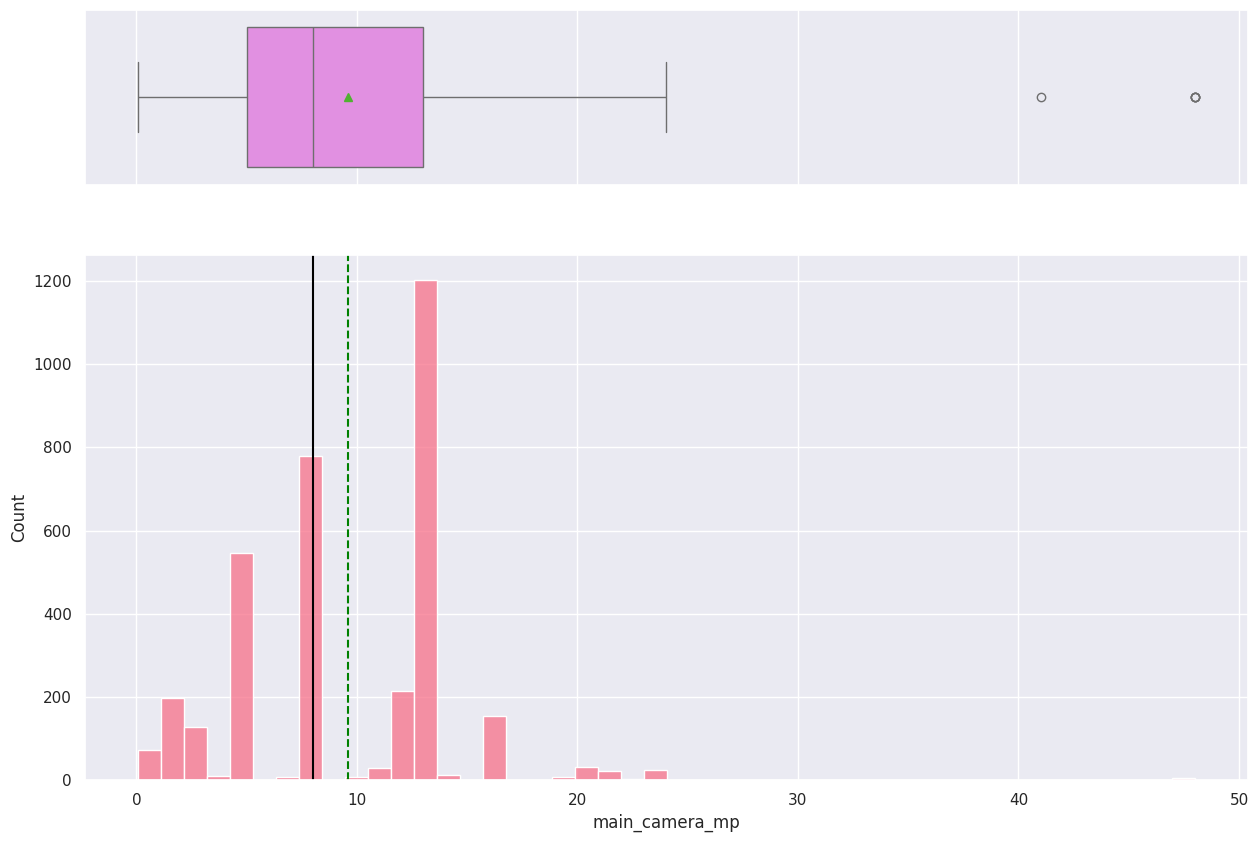

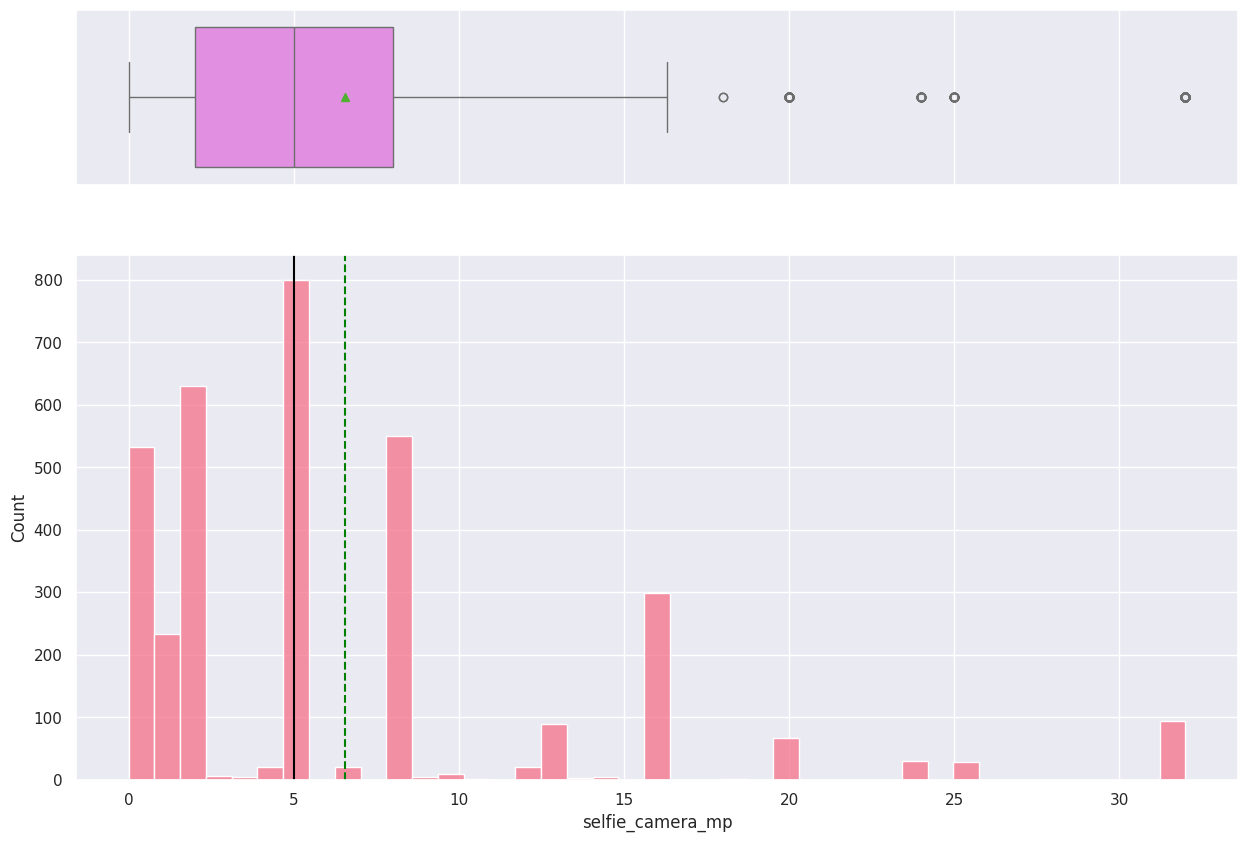

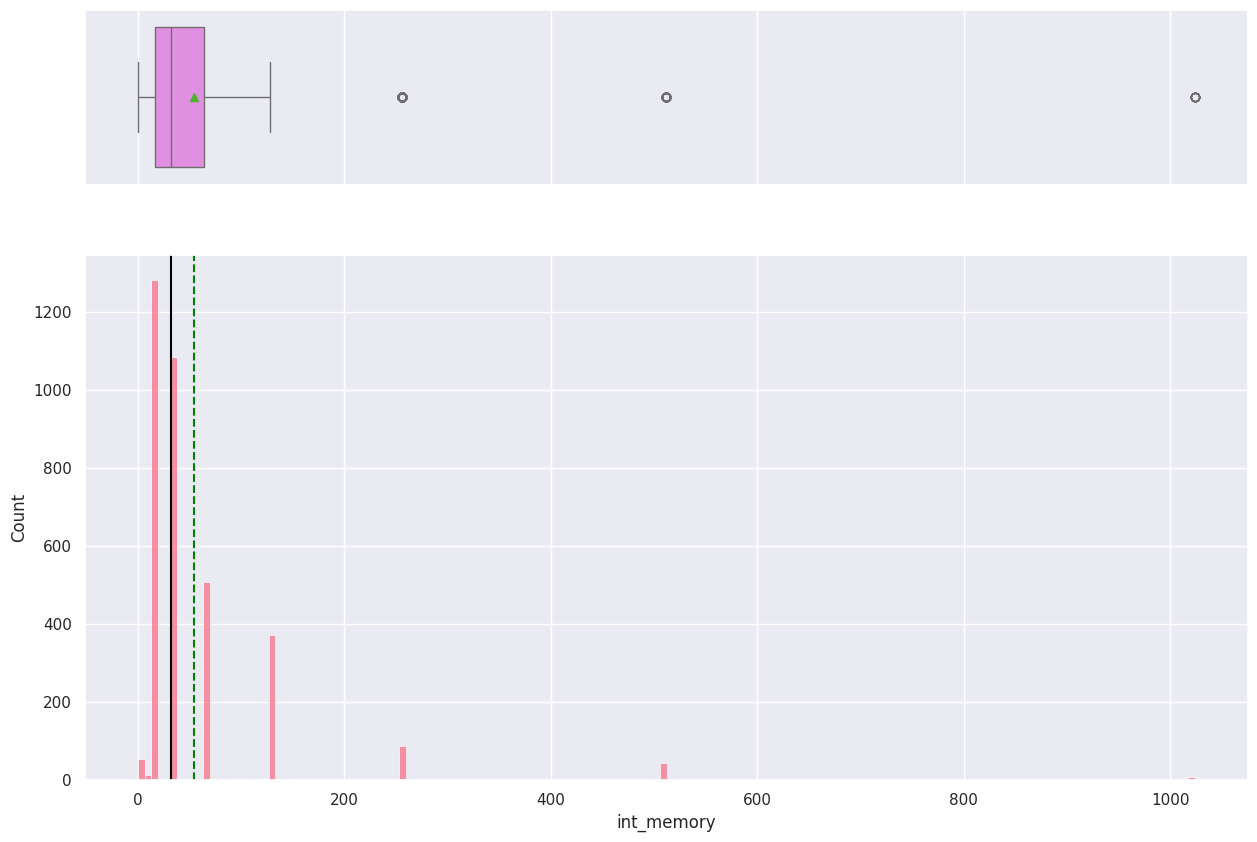

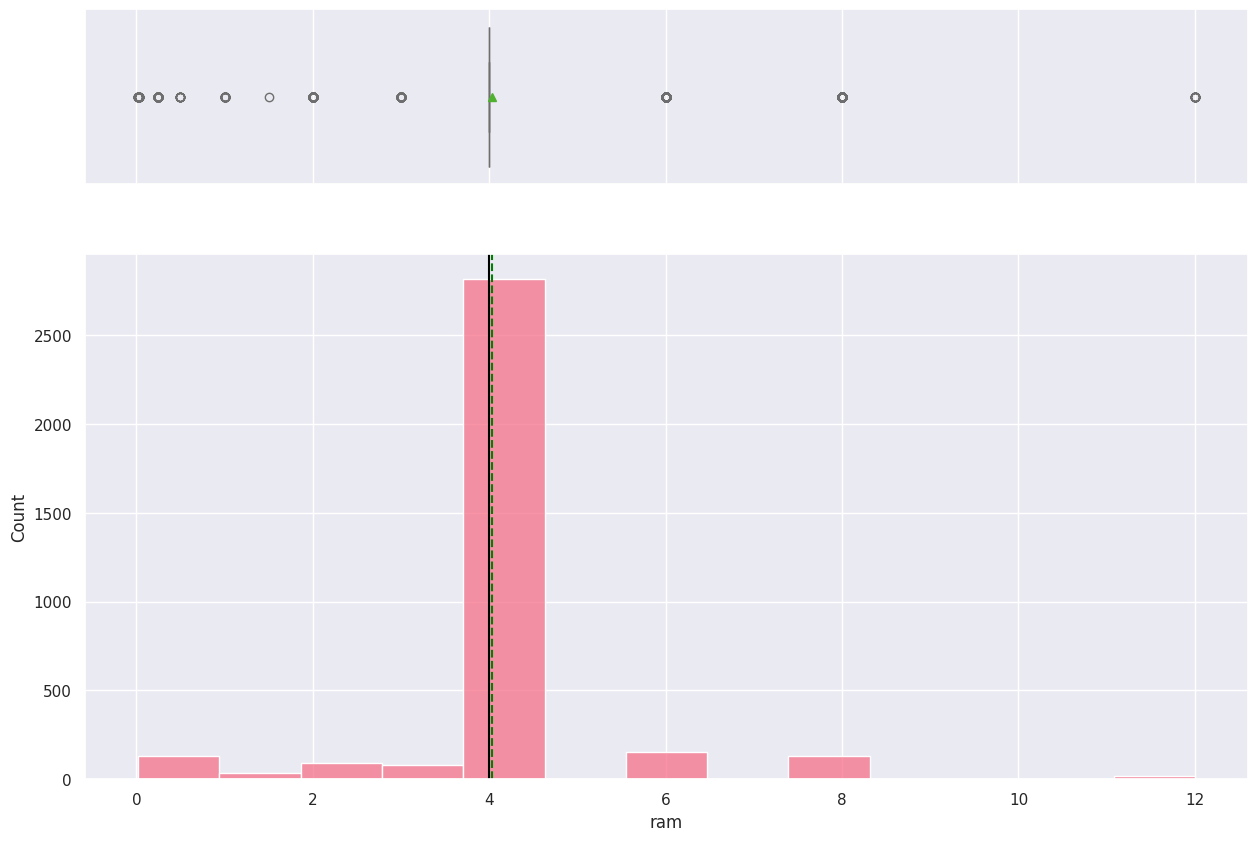

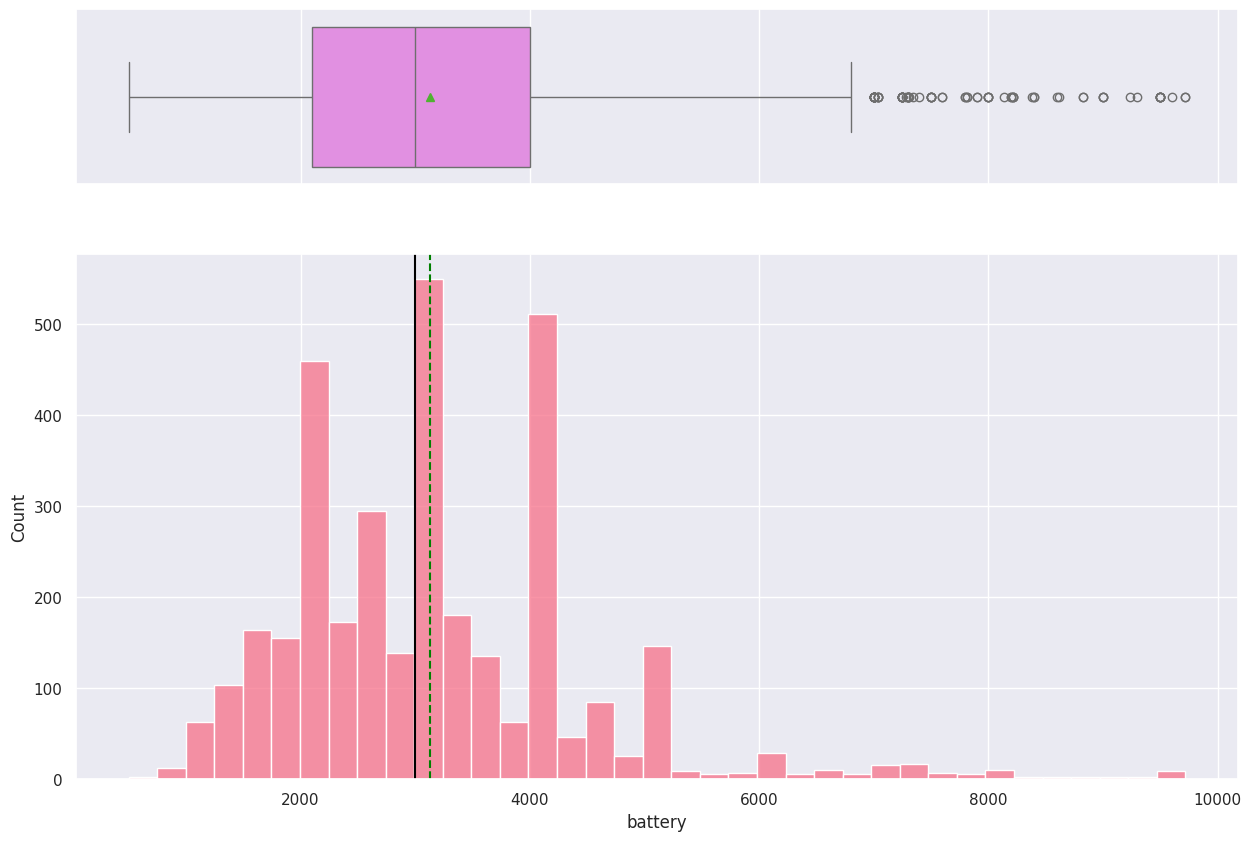

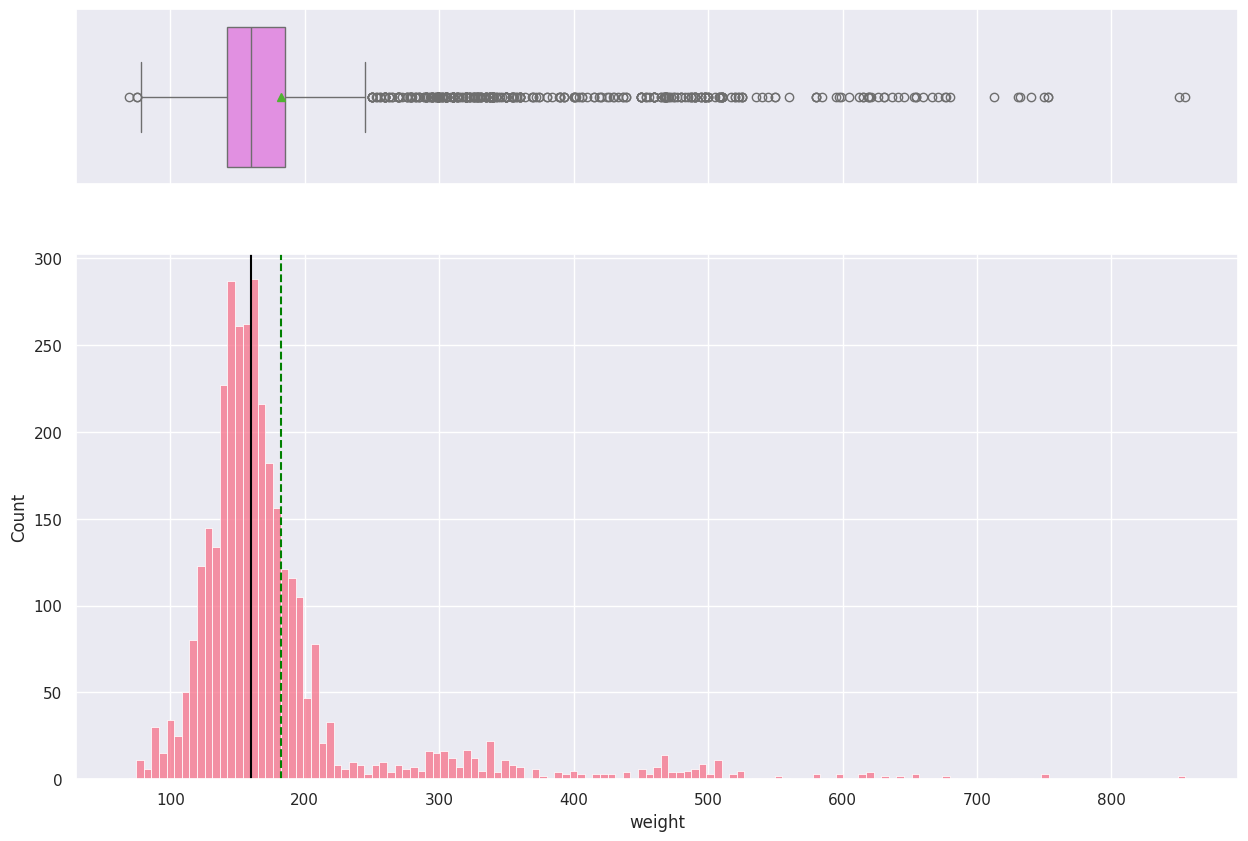

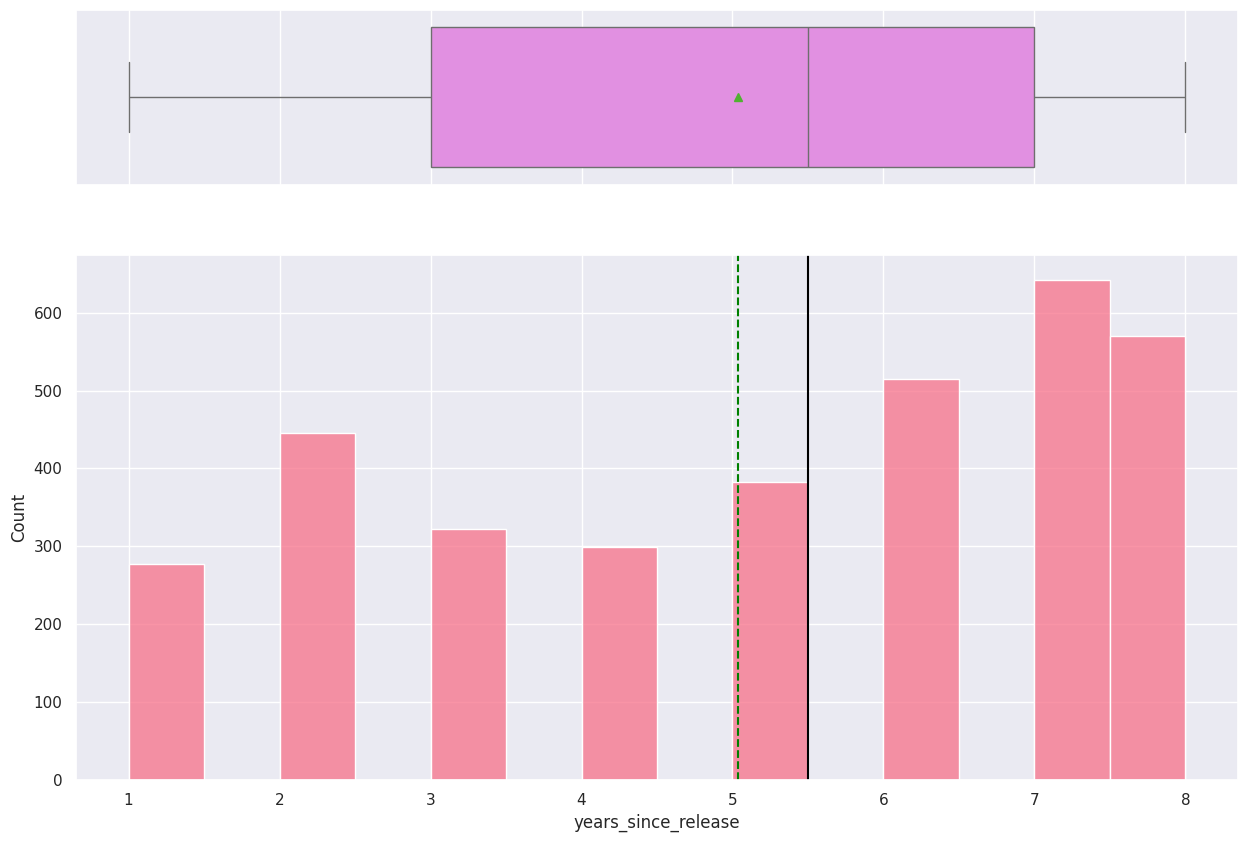

In [ ]:
for col in [ "main_camera_mp", "selfie_camera_mp", "int_memory", "ram", "battery", "weight","years_since_release"]:
    histogram_boxplot(df1, col)

It seems the data preprocessing doesn't change anything significally in terms of the distrubution as seen before.

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
# define the dependent and independent variables
X = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
# add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=['object','category']).columns.tolist(),
    drop_first=True,
    dtype=int
)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [ ]:
# Create a fit OLS model
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                           15:12:49   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.842**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3156**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `screensize` is **0.0244**.

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict normalized used price within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized used price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY


* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
# check VIF on train data
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ***ignore*** the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
# Create list of columns with high VIF and ignoring dummy columns
# the other columns with high VIF have been omitted since they belong to dummy variables
col_list = ['screen_size',
            'weight',
            ]

## check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


We'll drop screen_size column and check the VIF again.

In [ ]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [ ]:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                           15:18:35   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod3 = sm.OLS(y_train, x_train3).fit()
print(olsmod3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                           15:19:34   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod3_train_perf = model_performance_regression(olsmod3, x_train3, y_train)
olsmod3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod3_test_perf = model_performance_regression(olsmod3, x_test3, y_test)
olsmod3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod3* as the final model to move forward with
* Now adjusted R-squared is 0.838, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.842
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod3*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


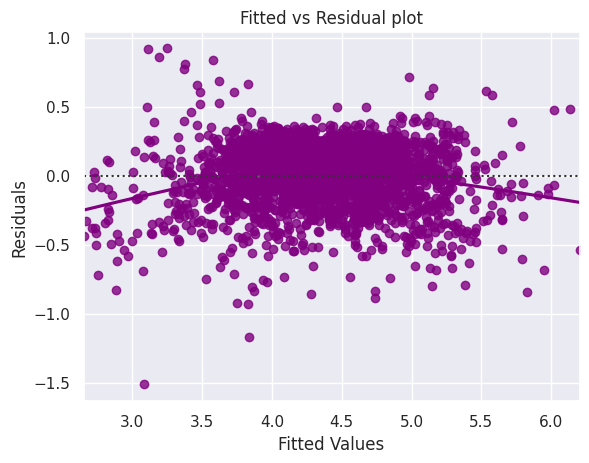

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

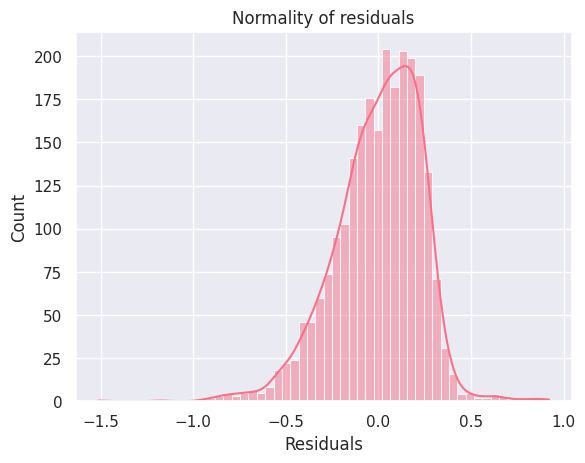

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

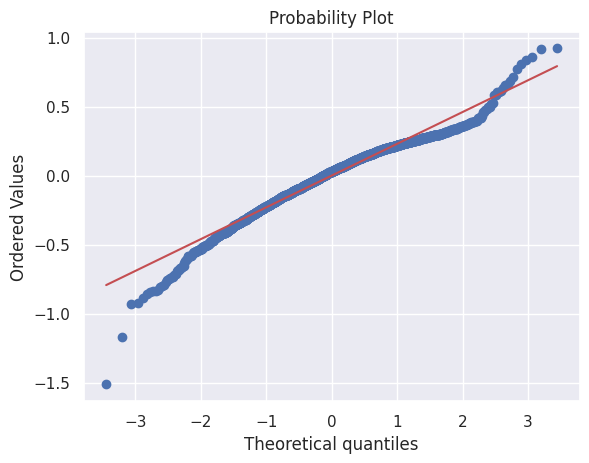

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676950829900581, pvalue=6.983856712618473e-23)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
Strictly speaking, the residuals are not normal.
However, as an approximation, we can accept this distribution as close to being normal.
So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 21 Jan 2025   Prob (F-statistic):               0.00
Time:                           15:21:38   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.5% of the anime ratings

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

### Key Insights
* Most of the basic device specifications like front and back camera specifications, RAM etc has a positive correlation on the prediction of used price as they are positive coefficients

* The normalized new price is another parameter thar shows a strong positive correlation with the used price. That means based on the new device price the price of the same device in used market also increases

* Its also noted that the year of release/years since release has a -ve coefficient in the prediction means, as the number years since release increases, the model gets older and there by price gets decreases, which makes sense

* The major/popular brands like Samsung and Sony found to have a -ve coefficient of correlation shows they are not much popular in the used phone market comapared to the other less major brands.

### Recommendations

The used phone dealer could concentrate on procuring used devices from certian brands that have a positive coffficients which are essentially not the major or popular ones.  

The normalized new price is another parameter that positively influences the used device price.

The basic device specs also becomes a factor in determining the price along with the years since release of the device.

*By discovering a proper balance between the above parameters and adjusting the inventory acoordingly could increase the potential profit for the dealer.*


___